# PyTorch Neural Network Classification

Architecture of a classification neural network --> Getting binary classification data ready --> Building a Pytorch classification model --> Fitting the model to data (training) --> Making predictions and evaluating a model (inference) --> Improving a model (from a model perspective) --> Non-linearity --> Replicating non-linear functions --> Putting it all together with multi-class classification

# Getting ready Classification Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

import torch
from torch import nn

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import requests 
from pathlib import Path

In [2]:
import os
os.environ['KMP_DUPLICATE_OK'] = 'True'

In [3]:
#generating samples
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [5]:
#converting data into dataframe
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

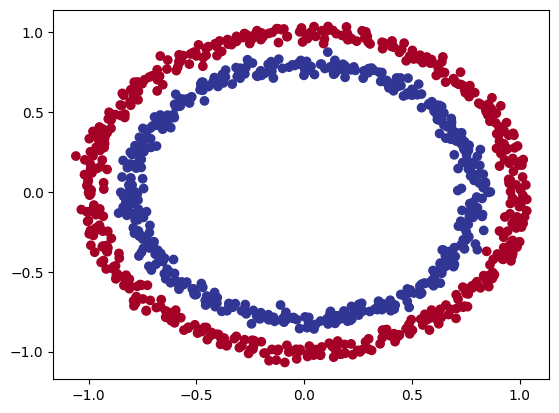

In [7]:
#plotting
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [10]:
#converting numpy into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Model Building

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [15]:
#basic model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [16]:
#model_0 = CircleModelV0
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
untrained_predictions = model_0(X_test)

In [18]:
print(f"Length of predictions: {len(untrained_predictions)}")
print(f"Shape of predictions: {untrained_predictions.shape}")
print(f"Length of y_test: {len(y_test)}")
print(f"Shape of y_test: {y_test.shape}")
print(f"First 10 predictions: {untrained_predictions[:10]}")
print(f"First 10 y_test: {y_test[:10]}")

Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
Length of y_test: 200
Shape of y_test: torch.Size([200])
First 10 predictions: tensor([[-0.6312],
        [-0.4735],
        [-0.5148],
        [-0.6664],
        [ 0.3261],
        [ 0.4158],
        [ 0.1933],
        [ 0.4037],
        [-0.5504],
        [-0.4537]], device='cuda:0', grad_fn=<SliceBackward0>)
First 10 y_test: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [19]:
#loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

In [20]:
#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [21]:
#accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [22]:
#before training model accuracy
accuracy_fn(y_test, untrained_predictions)

0.0

# Training Model

In [23]:
y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.6312],
        [-0.4735],
        [-0.5148],
        [-0.6664],
        [ 0.3261]], device='cuda:0', grad_fn=<SliceBackward0>)

In [24]:
#sgimoid function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3472],
        [0.3838],
        [0.3741],
        [0.3393],
        [0.5808]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [25]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

# Training and Testing loop

In [27]:
#train test split
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [28]:
torch.manual_seed(42)
epochs = 100

#training and validation
for epoch in range(epochs):
    model_0.train()
    train_logits = model_0(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.72291 | Train Acc: 50.50% | Test Loss: 0.71922 | Test Acc: 46.50%
Epoch: 10 | Train Loss: 0.71124 | Train Acc: 50.62% | Test Loss: 0.70861 | Test Acc: 44.50%
Epoch: 20 | Train Loss: 0.70534 | Train Acc: 50.25% | Test Loss: 0.70330 | Test Acc: 45.50%
Epoch: 30 | Train Loss: 0.70196 | Train Acc: 50.00% | Test Loss: 0.70032 | Test Acc: 49.00%
Epoch: 40 | Train Loss: 0.69981 | Train Acc: 50.25% | Test Loss: 0.69847 | Test Acc: 51.00%
Epoch: 50 | Train Loss: 0.69833 | Train Acc: 49.88% | Test Loss: 0.69724 | Test Acc: 53.00%
Epoch: 60 | Train Loss: 0.69725 | Train Acc: 49.62% | Test Loss: 0.69637 | Test Acc: 52.50%
Epoch: 70 | Train Loss: 0.69644 | Train Acc: 50.12% | Test Loss: 0.69574 | Test Acc: 53.00%
Epoch: 80 | Train Loss: 0.69580 | Train Acc: 50.38% | Test Loss: 0.69527 | Test Acc: 53.00%
Epoch: 90 | Train Loss: 0.69529 | Train Acc: 50.38% | Test Loss: 0.69491 | Test Acc: 52.50%


In [29]:
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exits skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exits skipping download


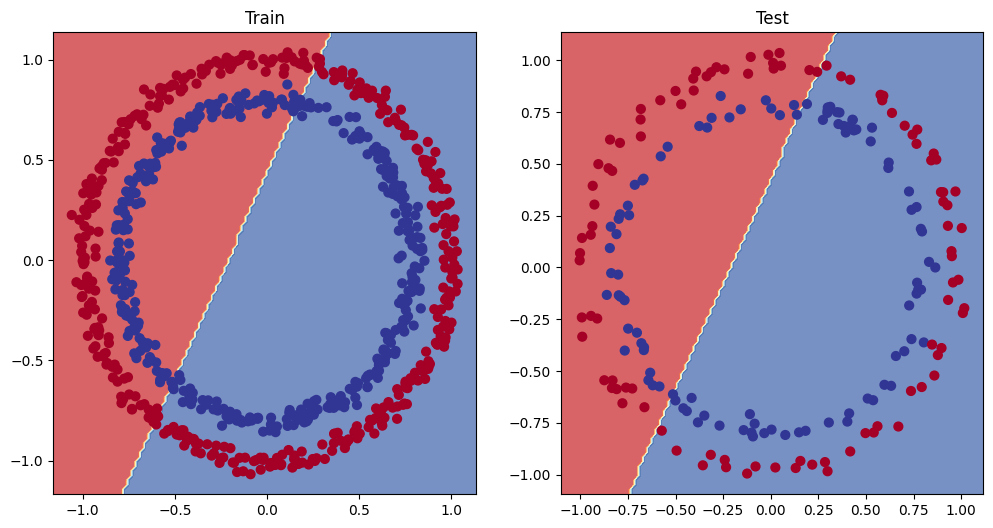

In [30]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving the model

In [31]:
#adding extra hidden layers
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [32]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
#loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

In [34]:
#optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [35]:
#accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [36]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [37]:
torch.manual_seed(42)
epochs = 1000

#training and validation
for epoch in range(epochs):
    model_1.train()
    train_logits  = model_1(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.70652 | Train Acc: 50.00% | Test Loss: 0.70287 | Test Acc: 50.00%
Epoch: 100 | Train Loss: 0.69323 | Train Acc: 49.75% | Test Loss: 0.69409 | Test Acc: 50.00%
Epoch: 200 | Train Loss: 0.69300 | Train Acc: 51.00% | Test Loss: 0.69456 | Test Acc: 46.50%
Epoch: 300 | Train Loss: 0.69298 | Train Acc: 51.38% | Test Loss: 0.69468 | Test Acc: 46.50%
Epoch: 400 | Train Loss: 0.69298 | Train Acc: 51.25% | Test Loss: 0.69470 | Test Acc: 45.50%
Epoch: 500 | Train Loss: 0.69298 | Train Acc: 51.25% | Test Loss: 0.69470 | Test Acc: 46.00%
Epoch: 600 | Train Loss: 0.69298 | Train Acc: 51.12% | Test Loss: 0.69469 | Test Acc: 46.00%
Epoch: 700 | Train Loss: 0.69298 | Train Acc: 51.12% | Test Loss: 0.69469 | Test Acc: 46.00%
Epoch: 800 | Train Loss: 0.69298 | Train Acc: 51.12% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Train Loss: 0.69298 | Train Acc: 51.12% | Test Loss: 0.69468 | Test Acc: 46.00%


# Linear Data

In [38]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [39]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

In [40]:
def plot_predictions(train_data, train_label, test_data, test_label, predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c = "b", s = 10, label = "Training data")
    plt.scatter(test_data, test_label, c = "g", s = 10, label = "Testing data")
    if predictions is not None:
        plt.scatter(predictions, test_label, c = "r", s = 10, label = "Predictions")
    plt.legend(prop = {"size": 14})

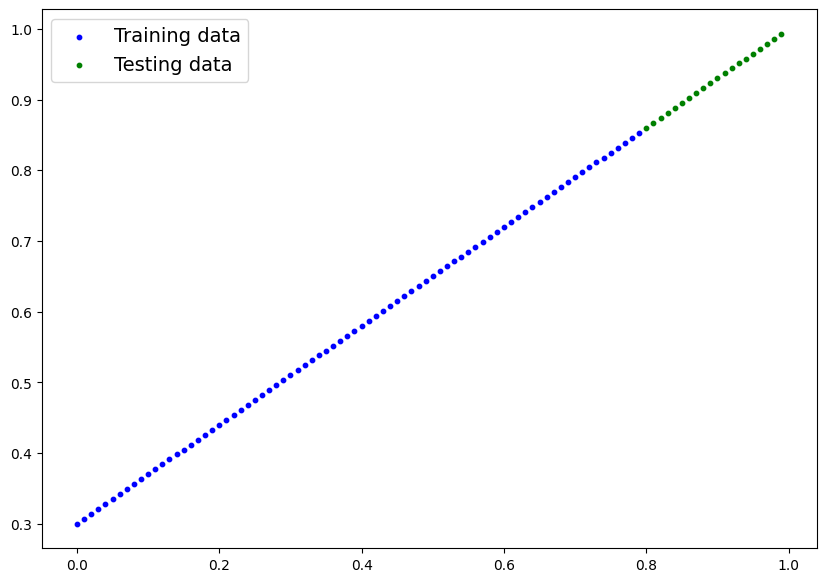

In [41]:
plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression)

In [42]:
#model for linear data
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

In [43]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
#loss function
loss_fn = nn.L1Loss()

In [45]:
#optimizer
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [46]:
#train test split
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

In [47]:
torch.manual_seed(42)

epochs = 1000

#training and validation
for epoch in range(epochs):
    model_2.train()
    train_pred = model_2(X_train_regression)
    train_loss = loss_fn(train_pred, y_train_regression)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Train Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Train Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Train Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Train Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Train Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Train Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Train Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Train Loss: 0.05599 | Test Loss: 0.01426
Epoch: 900 | Train Loss: 0.05571 | Test Loss: 0.00603


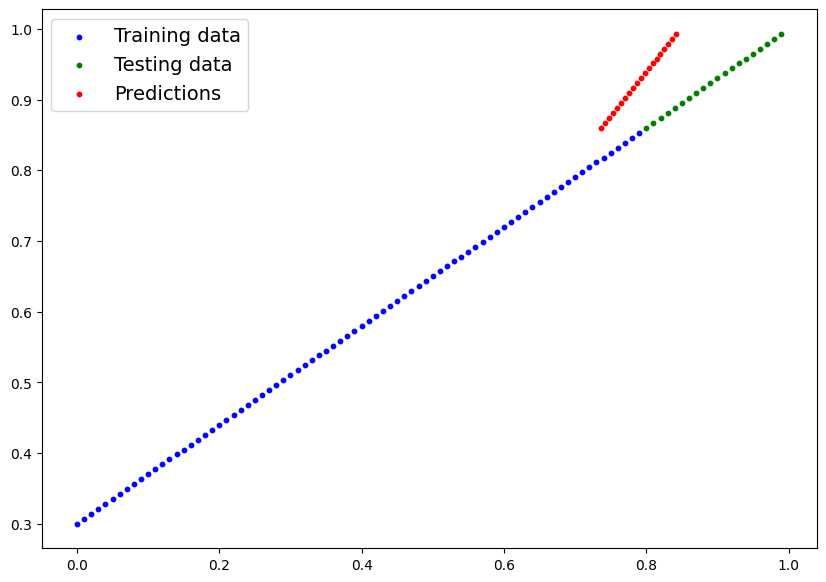

In [48]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
plot_predictions(X_train_regression.cpu(), y_train_regression.cpu(), X_test_regression.cpu(), y_test_regression.cpu(), y_preds.cpu())

# Non-Linear

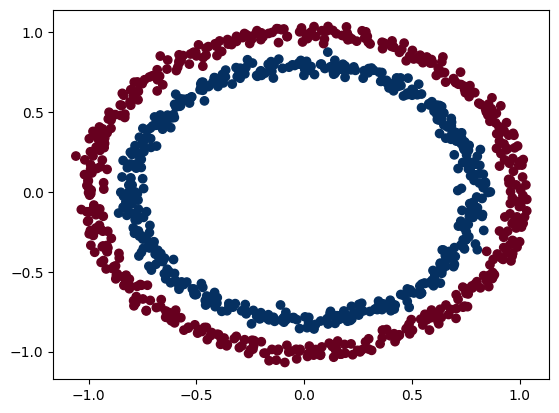

In [49]:
n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdBu)

In [50]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Building Model with Non-Linearity

In [51]:
#model for non-linear data
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [52]:
#loss function
loss_fn = nn.BCEWithLogitsLoss()

In [53]:
#optimizer
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [54]:
torch.manual_seed(42)
epochs = 1000

#train test split
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#training and validation
for epoch in range(epochs):
    model_3.train()
    train_logits = model_3(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.69295 | Train Acc: 50.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 100 | Train Loss: 0.69115 | Train Acc: 52.88% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 200 | Train Loss: 0.68977 | Train Acc: 53.37% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 300 | Train Loss: 0.68795 | Train Acc: 53.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 400 | Train Loss: 0.68517 | Train Acc: 52.75% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 500 | Train Loss: 0.68102 | Train Acc: 52.75% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 600 | Train Loss: 0.67515 | Train Acc: 54.50% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Train Loss: 0.66659 | Train Acc: 58.38% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Train Loss: 0.65160 | Train Acc: 64.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Train Loss: 0.62362 | Train Acc: 74.00% | Test Loss: 0.69468 | Test Acc: 46.00%


In [55]:
model_3.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test)))
y_preds[:10], y_test[:10]

(tensor([[1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

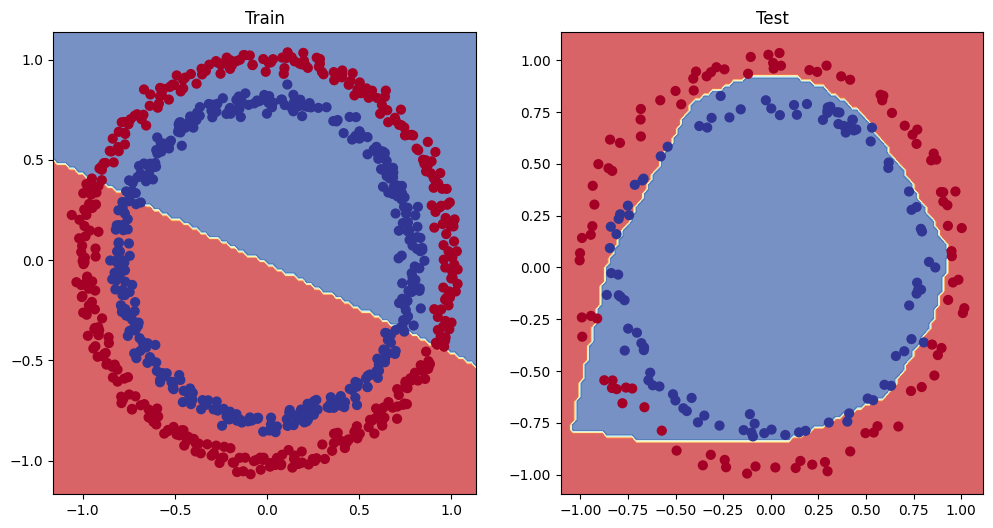

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


# Replicating Non-Linear activation functions

In [57]:
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

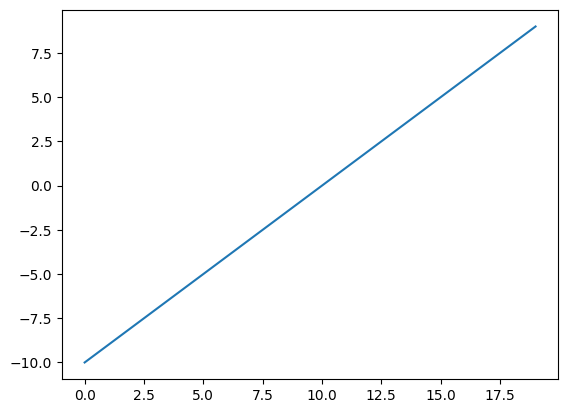

In [58]:
plt.plot(A)

In [59]:
def relu(x):
    return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

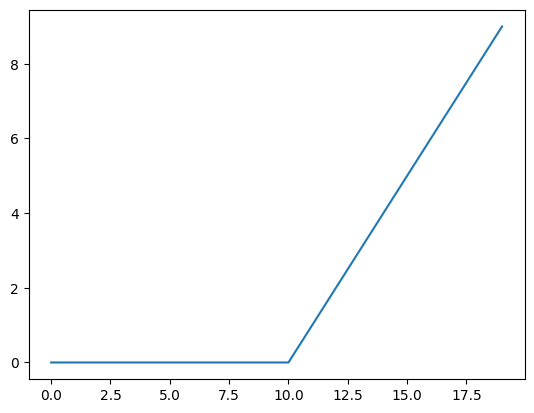

In [60]:
plt.plot(relu(A))

In [61]:
def sigmoid(x):
    return 1 / (1 +  torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

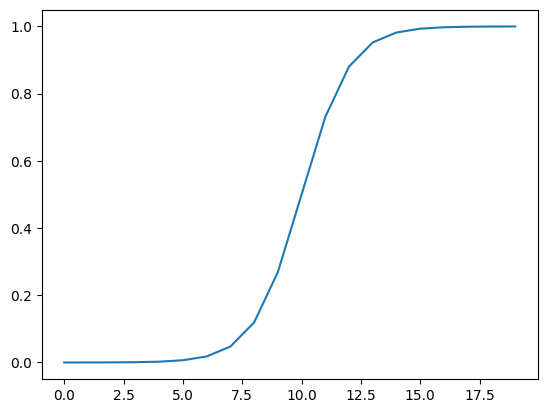

In [62]:
plt.plot(sigmoid(A))

# Multiclass Classification

In [63]:
num_classes = 4
num_features = 2
random_seed = 42
n_samples = 1000

X_blob, y_blob = make_blobs(n_samples, n_features = num_features, centers = num_classes, cluster_std = 1.5, random_state = random_seed)

In [64]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


In [65]:
#train test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = 42)
len(X_blob_train), len(X_blob_test), len(y_blob_train), len(y_blob_test)

(800, 200, 800, 200)

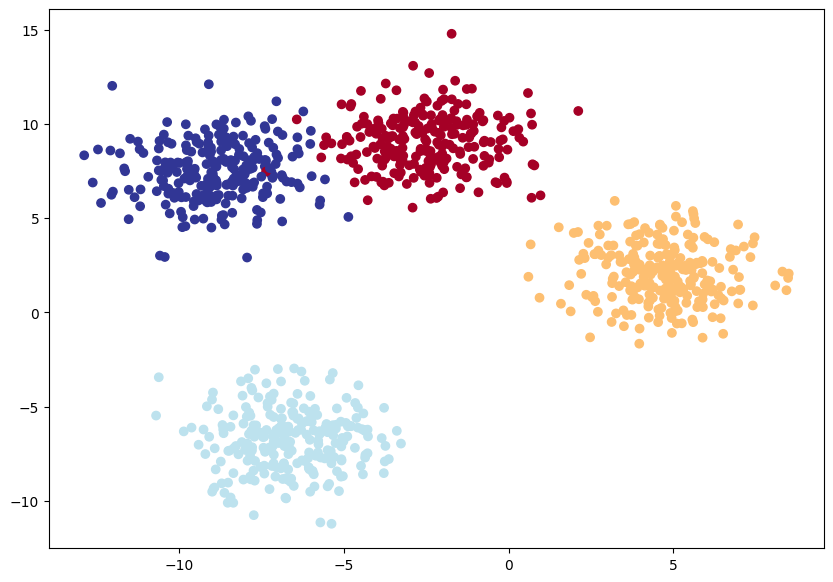

In [66]:
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu)

In [67]:
#multiclass classification model building
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_features),
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [68]:
model_4 = BlobModel(input_features = num_features, output_features = num_classes, hidden_units = 8).to(device)

In [69]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [70]:
#loss function
loss_fn = nn.CrossEntropyLoss()

In [71]:
#optimizer
optimizer = torch.optim.SGD(model_4.parameters(), lr = 0.1)

In [72]:
model_4(X_blob_train.to(device)[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [73]:
model_4(X_blob_train.to(device))[0].shape, num_classes

(torch.Size([4]), 4)

In [74]:
y_logits = model_4(X_blob_test.to(device))
y_logits[:5]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [75]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [76]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


In [77]:
torch.manual_seed(42)
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#training and validation
for epoch in range(epochs):
    model_4.train()
    train_logits = model_4(X_blob_train)
    train_preds = torch.softmax(train_logits, dim = 1).argmax(dim = 1)
    train_loss = loss_fn(train_logits, y_blob_train)
    train_acc = accuracy_fn(y_blob_train, train_preds)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_preds)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 1.04324 | Train Acc: 65.50% | Test Loss: 0.57861 | Test Acc: 95.50%
Epoch: 10 | Train Loss: 0.14398 | Train Acc: 99.12% | Test Loss: 0.13037 | Test Acc: 99.00%
Epoch: 20 | Train Loss: 0.08062 | Train Acc: 99.12% | Test Loss: 0.07216 | Test Acc: 99.50%
Epoch: 30 | Train Loss: 0.05924 | Train Acc: 99.12% | Test Loss: 0.05133 | Test Acc: 99.50%
Epoch: 40 | Train Loss: 0.04892 | Train Acc: 99.00% | Test Loss: 0.04098 | Test Acc: 99.50%
Epoch: 50 | Train Loss: 0.04295 | Train Acc: 99.00% | Test Loss: 0.03486 | Test Acc: 99.50%
Epoch: 60 | Train Loss: 0.03910 | Train Acc: 99.00% | Test Loss: 0.03083 | Test Acc: 99.50%
Epoch: 70 | Train Loss: 0.03643 | Train Acc: 99.00% | Test Loss: 0.02799 | Test Acc: 99.50%
Epoch: 80 | Train Loss: 0.03448 | Train Acc: 99.00% | Test Loss: 0.02587 | Test Acc: 99.50%
Epoch: 90 | Train Loss: 0.03300 | Train Acc: 99.12% | Test Loss: 0.02423 | Test Acc: 99.50%


In [78]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:5]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186]], device='cuda:0')

In [79]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06]], device='cuda:0')

In [80]:
y_preds = y_pred_probs.argmax(dim = 1)
y_preds[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [81]:
print(f"Predictions: {y_preds[:20]}")
print(f"Actual: {y_blob_test[:20]}")
print(F"Test Accuracy: {accuracy_fn(y_blob_test, y_preds)}")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3],
       device='cuda:0')
Actual: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3],
       device='cuda:0')
Test Accuracy: 99.5


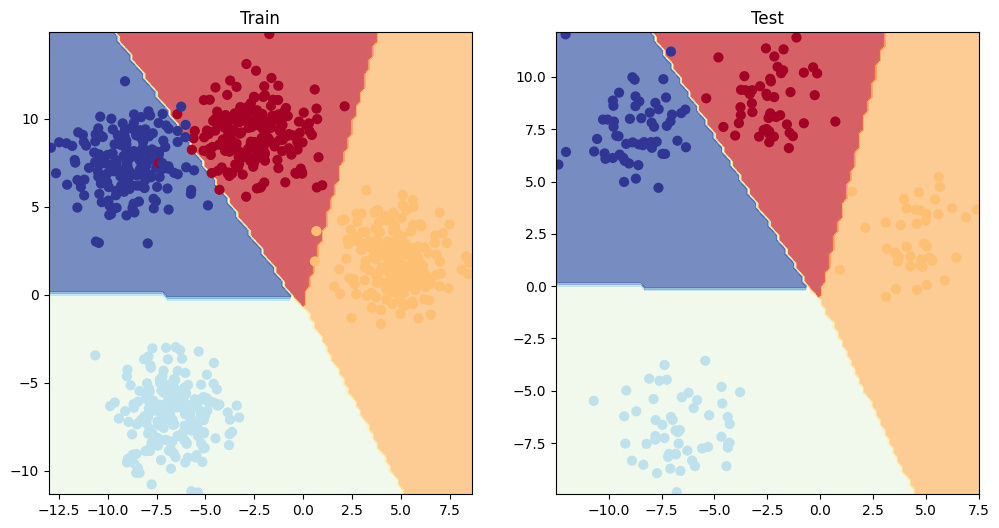

In [82]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [83]:
import torchmetrics

C:\Users\ppamr\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [84]:
torchmetrics_accuracy = torchmetrics.Accuracy(task = "multiclass", num_classes = 4).to(device)

In [85]:
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [86]:
torchmetrics_precision = torchmetrics.Precision(task = "multiclass", num_classes = 4).to(device)

In [87]:
torchmetrics_precision(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [88]:
torchmetrics_recall = torchmetrics.Recall(task = "multiclass", num_classes = 4).to(device)

In [89]:
torchmetrics_recall(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [90]:
torchmetrics_f1score = torchmetrics.F1Score(task = "multiclass", num_classes = 4).to(device)

In [91]:
torchmetrics_f1score(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [92]:
torchmetrics_confusionmatrix = torchmetrics.ConfusionMatrix(task = "multiclass", num_classes = 4).to(device)

In [93]:
torchmetrics_confusionmatrix(y_preds, y_blob_test)

tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 1,  0,  0, 56]], device='cuda:0')